In [1]:
# Import des bibliothèques
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

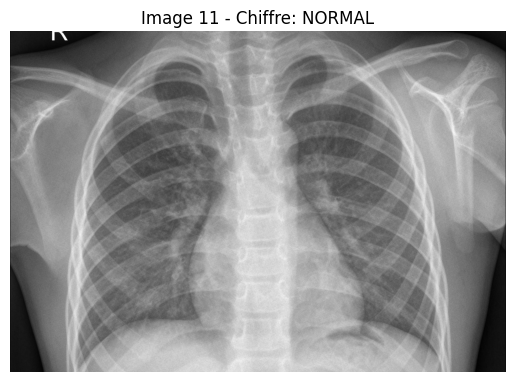

In [6]:
# Création d'une classe
class XrayLoader:
    def init(self):
        self.x_train = None
        self.y_train = None
        self.x_val = None
        self.y_val = None
        self.x_test = None
        self.y_test = None

    def load_data(self):
        data_folder = './chest_Xray'
        subfolders = ["train","val","test"]
        categories = ["NORMAL","PNEUMONIA"]
        data = {}

        for subfolder in subfolders:
            data[subfolder] = {"x":[],"y":[]}
            for category in categories:
                # pour avoir tous les chemins des 6 dossiers
                folder_path = os.path.join(data_folder,subfolder,category)
                # liste de toutes les images
                images_files = os.listdir(folder_path)
                for file_name in images_files:
                    image_path = os.path.join(folder_path,file_name)
                    img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
                    data[subfolder]["x"].append(img)
                    data[subfolder]["y"].append(category)

        self.x_train = data["train"]["x"]
        self.y_train = data["train"]["y"]
        self.x_val = data["val"]["x"]
        self.y_val = data["val"]["y"]
        self.x_test = data["test"]["x"]
        self.y_test = data["test"]["y"]

    def display_image(self,dataset,index):
        if dataset == 'train':
            image = self.x_train[index]
            label = self.y_train[index]
        elif dataset == 'test':
            image = self.x_test[index]
            label = self.y_test[index]
        else:
            raise ValueError('Invalid dataset. Choose either "train" or "test".')

        plt.imshow(image,cmap="gray")
        plt.title(f'Image {index} - Chiffre: {label}')
        plt.axis('off')
        plt.show()

# Charger les données
loader = XrayLoader()
loader.load_data()

# Afficher une image
loader.display_image('test', 11)